### 비지도 학습
- 정답이 없는 데이터
- 군집 알고리즙(clustering) : K-Mean , DBScan , PCA 

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy


--2022-12-07 00:20:48--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-12-07 00:20:48--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-12-07 00:20:49--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fruits = np.load('fruits_300.npy')
print('type  - ' , type(fruits))
print('shape - ' , fruits.shape)

type  -  <class 'numpy.ndarray'>
shape -  (300, 100, 100)


첫번째 데이터 , 이미지 시각화 - 
data - 
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]



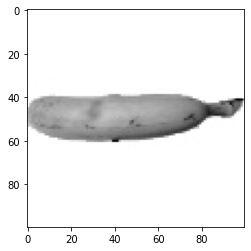

In [11]:
print('첫번째 데이터 , 이미지 시각화 - ')
print('data - ')
print(fruits[ 0 , 0 , : ])
print()

# 이미지 출력하기
plt.imshow(fruits[0] , cmap = 'gray')
# gray_r gray 반전
plt.imshow(fruits[0] , cmap = 'gray_r')

# 다른 번호 확인
plt.imshow(fruits[200] , cmap = 'gray_r')

plt.show()
plt.close()

In [17]:
print('이미지 분석 - ')
print('사과 , 파인애플 , 바나나 -')
print('계산의 편리성을 위해서 이미지를 2 ndarray -> 1 ndarray')

apples = fruits[0:100].reshape(-1 , 100*100)
#apples.shape
pineapples = fruits[100:200].reshape(-1 , 100*100)
bananas = fruits[200:300].reshape(-1 , 100*100)

이미지 분석 - 
사과 , 파인애플 , 바나나 -
계산의 편리성을 위해서 이미지를 2 ndarray -> 1 ndarray


In [21]:
print('각 이미지 픽셀에 대한 평균을 구하고 히스토그램을 만들어 본다면 - ')
print(apples[0])
print()
print(apples.mean(axis = 1))

각 이미지 픽셀에 대한 평균을 구하고 히스토그램을 만들어 본다면 - 
[1 1 1 ... 1 1 1]

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


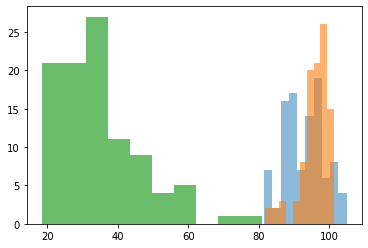

In [23]:
plt.hist(np.mean(apples , axis = 1) , alpha = 0.5)
plt.hist(np.mean(pineapples , axis = 1) , alpha = 0.6)
plt.hist(np.mean(bananas , axis = 1) , alpha = 0.7)

plt.legend('apple' , 'pineapple' , 'banana')
plt.show()
plt.close()

사과, 파인애플이 겹치는 부분이 많아서 구분하기 쉽지 않다.
픽셀별 평균값을 비교하도록 한다.
subplot - 1, 3


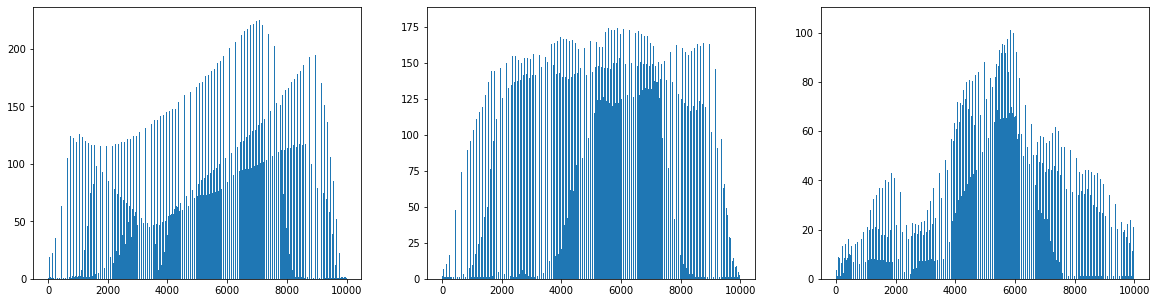

In [28]:
print('사과, 파인애플이 겹치는 부분이 많아서 구분하기 쉽지 않다.')
print('픽셀별 평균값을 비교하도록 한다.')
print('subplot - 1, 3')

fig = plt.figure(figsize = (20, 5))
area01 = fig.add_subplot(1,3,1)
area01.bar(range(10000) , np.mean(apples , axis = 0))

area02 = fig.add_subplot(1,3,2)
area02.bar(range(10000) , np.mean(pineapples , axis = 0))

area03 = fig.add_subplot(1,3,3)
area03.bar(range(10000) , np.mean(bananas , axis = 0))




# plt.legend('apple' , 'pineapple' , 'banana')
plt.show()
plt.close()


In [32]:
apple_mean = np.mean(apples , axis = 0 ).reshape(100 , 100)
pineapple_mean = np.mean(pineapples , axis = 0 ).reshape(100 , 100)
banana_mean = np.mean(bananas , axis = 0 ).reshape(100 , 100)

사과, 파인애플이 겹치는 부분이 많아서 구분하기 쉽지 않다.
픽셀별 평균값을 비교하도록 한다.
subplot - 1, 3


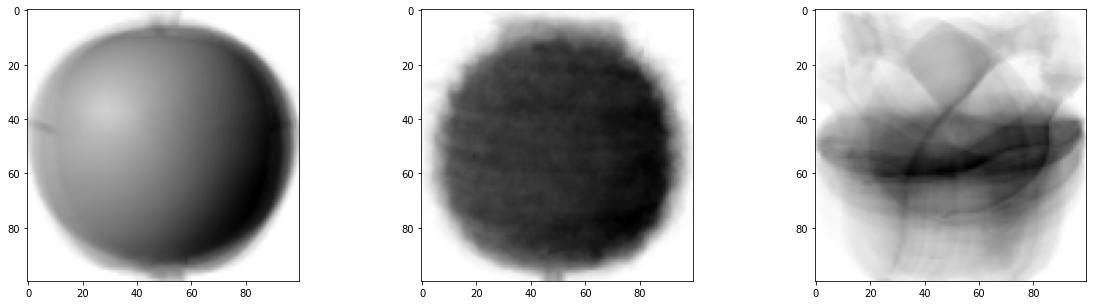

In [33]:
print('사과, 파인애플이 겹치는 부분이 많아서 구분하기 쉽지 않다.')
print('픽셀별 평균값을 비교하도록 한다.')
print('subplot - 1, 3')

fig = plt.figure(figsize = (20, 5))
area01 = fig.add_subplot(1,3,1)
area01.imshow(apple_mean , cmap = 'gray_r')

area02 = fig.add_subplot(1,3,2)
area02.imshow(pineapple_mean , cmap = 'gray_r')

area03 = fig.add_subplot(1,3,3)
area03.imshow(banana_mean , cmap = 'gray_r')




# plt.legend('apple' , 'pineapple' , 'banana')
plt.show()
plt.close()


In [37]:
# 절댓값으로 차이를 구한다.

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff , axis = (1,2))
print(abs_mean.shape)
print(abs_mean[0])

(300,)
17.37576


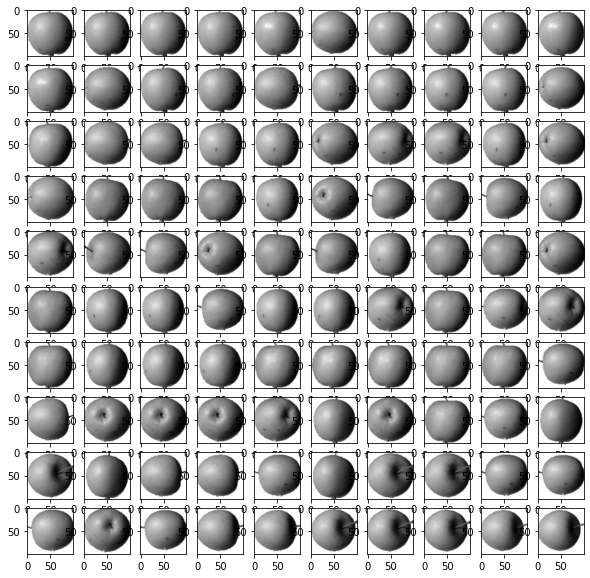

In [43]:
apple_idx = np.argsort(abs_mean[:100])
fig, area = plt.subplots(10, 10, figsize = (10 , 10))
for i in range(10) :
  for j in range(10) :
    area[i , j].imshow(fruits[apple_idx[i*10 + j]] , cmap = 'gray_r')
    

- KMeans

In [46]:
fruits.shape
fruits_vector = fruits.reshape(-1 , 100*100)
fruits_vector.shape

(300, 10000)

In [49]:
from sklearn.cluster import KMeans

# 군집 생성 n_clusters 생성할 군집 개수
# KMeans : 유클리드 계산 방식

k_means = KMeans(n_clusters = 3 , random_state = 100)
k_means.fit(fruits_vector)

KMeans(n_clusters=3, random_state=100)

In [50]:
print('군집화된 라벨 - ' , k_means.labels_)

군집화된 라벨 -  [2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [51]:
np.unique(k_means.labels_ , return_counts = True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [69]:

def user_draw(ary , ratio = 1) :
  size = len(ary)  
  # 소수점 첫째자리 올림
  rows = int(np.ceil(size / 10))
  cols = size if rows < 2 else 10 
  fig, area = plt.subplots(rows, cols, figsize = (cols*ratio , rows*ratio) , squeeze = False)
  for i in range(rows) :
    for j in range(cols) :
      if i*10+j < size :
        area[i , j].imshow(ary[i*10 + j] , cmap = 'gray_r')
      area[i,j].axis('off')
  plt.show()
  plt.close()

  
    
  



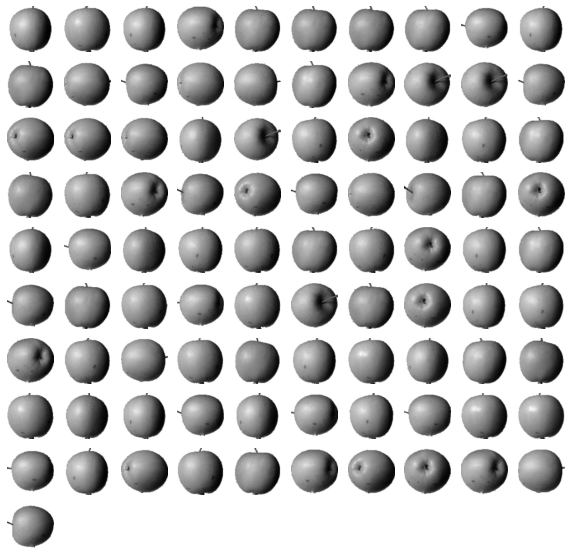

In [63]:
user_draw(fruits[k_means.labels_ == 2])

In [ ]:
k_means.cluster_centers_

In [ ]:
k_means.cluster_centers_.reshape(-1 , 100 , 100)

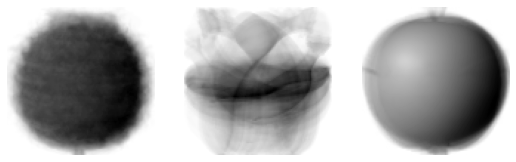

In [70]:
user_draw(k_means.cluster_centers_.reshape(-1 , 100 , 100) , ratio = 3)

In [68]:
print(k_means.n_iter_)

4


In [71]:
import pandas as pd
import seaborn as sns


In [72]:
df = pd.DataFrame(columns=('x', 'y'))
df.loc[0] = [7,1]
df.loc[1] = [2,1]
df.loc[2] = [4,2]
df.loc[3] = [9,4]
df.loc[4] = [10,5]
df.loc[5] = [10,6]
df.loc[6] = [11,5]
df.loc[7] = [11,6]
df.loc[8] = [15,3]
df.loc[9] = [15,2]
df.loc[10] = [16,6]
df.loc[11] = [16,1]

df

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


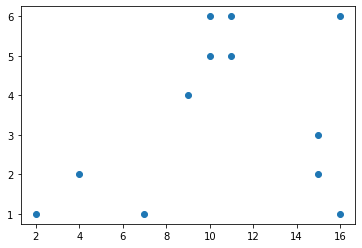

In [77]:
plt.scatter(df['x'] , df['y'])
plt.show()
plt.close()

In [78]:
k_means = KMeans(n_clusters = 3 , random_state = 100)
# 데이터 형식 주의할 것
k_means.fit(df.values)
k_means.labels_

array([1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [80]:
df['cluster_id'] = k_means.labels_
df

,x,y,cluster_id
0,7,1,1
1,2,1,1
2,4,2,1
3,9,4,2
4,10,5,2
5,10,6,2
6,11,5,2
7,11,6,2
8,15,3,0
9,15,2,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


UFuncTypeError: ignored

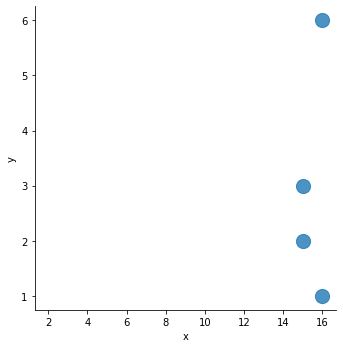

In [81]:
sns.lmplot('x' , 'y' , data = df , hue = 'cluster_id' , scatter_kws={'s' : 200 })

In [82]:
from sklearn.datasets import make_blobs


In [83]:
x , y = make_blobs(n_samples=300 , n_features=2 , centers=3 , random_state=1)

In [ ]:
x

In [ ]:
y

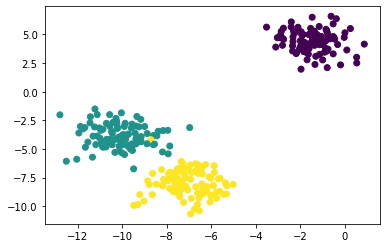

In [124]:
plt.scatter(x[: , 0] , x[:,1] , marker = 'o' , c = y)
plt.show()
plt.close()

In [90]:
feature , label = make_blobs(random_state=100)
cluster_mean = KMeans(n_clusters=3)
cluster_mean.fit(featur)

KMeans(n_clusters=3)

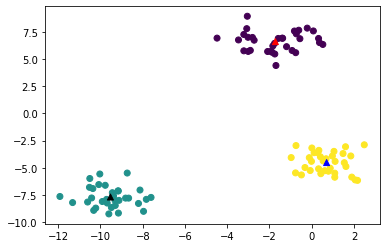

In [93]:

plt.scatter(feature[: , 0] , feature[:,1] , marker = 'o' , c = cluster_mean.labels_)
plt.scatter(cluster_mean.cluster_centers_[: , 0] , cluster_mean.cluster_centers_[:,1] , marker = '^' , c = ['r' , 'k' , 'b'])
plt.show()
plt.close()

In [86]:
plt.scatter(feature[: , 0] , feature[:,1] , marker = 'o' , c = cluster_mean.labels_)
plt.show()
plt.close()

In [97]:
from sklearn.datasets import load_iris
iris = load_iris()
print('keys - ' , iris.keys())

keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [100]:
iris_frm = pd.DataFrame(data = iris.data , 
                        columns = iris.feature_names)
iris_frm.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
iris_clustering = KMeans(n_clusters = 3 , random_state = 100 , max_iter = 300 )
iris_clustering.fit(iris_frm.values)

KMeans(n_clusters=3, random_state=100)

In [104]:
iris_clustering.fit(iris_frm.values)

KMeans(n_clusters=3, random_state=100)

In [107]:
iris_frm['cluster_id'] = iris_clustering.labels_
iris_frm['target']     = iris.target
iris_frm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [110]:
iris_frm.groupby(['target' , 'cluster_id'])['sepal length (cm)'].count()

target  cluster_id
0       0             50
1       1             48
        2              2
2       1             14
        2             36
Name: sepal length (cm), dtype: int64

from pandas.core.computation.expr import REDUCTIONS
#### PCA 
- Principal Component Analysis (차원 축소)
- 데이터의 피처를 압축(차원을 낮추는 것)
- 왜? 많은 피처로 학습을 할 경우 과대적합의 위험성이 존재한다.
- dimensionality reduction
- 상관관계가 밀접한 연관성을 잇는 피처를 합치는 것
- 습도 - 강수량 : 하나로 합친다.
- 전제조건으로 표준화 , 정규화가 필요함.


데이터 분포 확인을 위한 시각화 - 
0 - ^
1 - o
2 - s


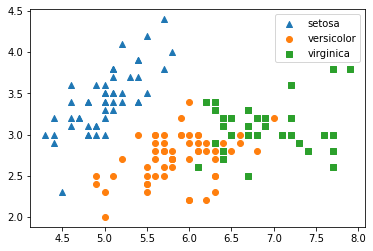

In [114]:
from matplotlib.lines import MarkerStyle
print('데이터 분포 확인을 위한 시각화 - ')
markers = ['^' , 'o' , 's']

for idx, marker in enumerate(markers) :
  print(idx , '-' , marker)
  x_data_point = iris_frm[ iris_frm['cluster_id'] == idx ]['sepal length (cm)']
  y_data_point = iris_frm[ iris_frm['cluster_id'] == idx ]['sepal width (cm)']
  
  plt.scatter(x_data_point , y_data_point , marker = marker , label = iris.target_names[idx])
plt.legend()
plt.show()
plt.close()


In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(iris_frm.iloc[ : , : 4])
scaler_iris_frm = pd.DataFrame(scaler)

scaler_iris_frm.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_iris = pca.fit_transform(scaler_iris_frm.values)




In [121]:
pca_iris_frm = pd.DataFrame(pca_iris , columns = ['pca01' , 'pca02'])
pca_iris_frm['cluster_id'] = iris_clustering.labels_
pca_iris_frm.head()

,pca01,pca02,cluster_id
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


데이터 분포 확인을 위한 시각화 - 
0 - ^
1 - o
2 - s


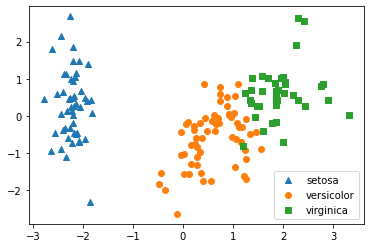

In [123]:
print('데이터 분포 확인을 위한 시각화 - ')
markers = ['^' , 'o' , 's']

for idx, marker in enumerate(markers) :
  print(idx , '-' , marker)
  x_data_point = pca_iris_frm[ iris_frm['cluster_id'] == idx ]['pca01']
  y_data_point = pca_iris_frm[ iris_frm['cluster_id'] == idx ]['pca02']
  
  plt.scatter(x_data_point , y_data_point , marker = marker , label = iris.target_names[idx])
plt.legend()
plt.show()
plt.close()


In [130]:
iris_frm['pca_x'] = pca_iris[: , 0]
iris_frm['pca_y'] = pca_iris[: , 1]

iris_frm.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_id,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,0,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,0,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,0,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,0,-2.389842,0.646835


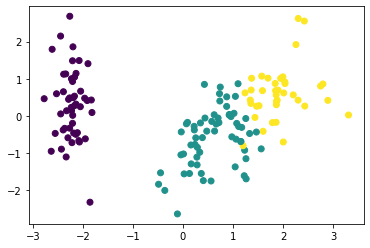

<function matplotlib.pyplot.close(fig=None)>

In [135]:
plt.scatter(x = iris_frm['pca_x'] , y = iris_frm['pca_y'] , c = iris_frm['cluster_id'])

plt.show()
plt.close

In [139]:
iris_clustering = KMeans(n_clusters=3)
iris_clustering.fit(iris_frm.iloc[: , -2:])


KMeans(n_clusters=3)

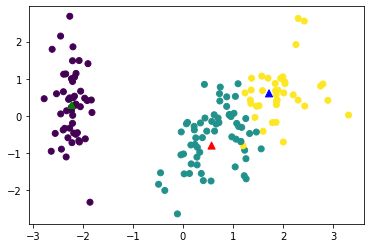

<function matplotlib.pyplot.close(fig=None)>

In [152]:
plt.scatter(x = iris_frm['pca_x'] , y = iris_frm['pca_y'] , c = iris_frm['cluster_id'])
plt.scatter(x = iris_clustering.cluster_centers_[:,0] , y = iris_clustering.cluster_centers_[:,1] 
            , marker = '^' , c = ['r' , 'g' , 'b'] 
            , s = 50)
plt.show()
plt.close

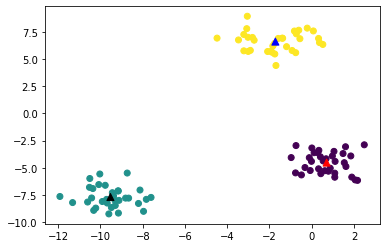

In [150]:
feature , label = make_blobs(random_state=100)
cluster_mean = KMeans(n_clusters=3)
cluster_mean.fit(feature)
plt.scatter(feature[: , 0] , feature[:,1] , marker = 'o' , c = cluster_mean.labels_)
plt.scatter(cluster_mean.cluster_centers_[: , 0] , cluster_mean.cluster_centers_[:,1] , marker = '^' , c = ['r' , 'k' , 'b'] 
            , s = 50)
plt.show()
plt.close()

In [148]:
iris_clustering.cluster_centers_[: , 0]

array([ 0.57262144, -2.22475316,  1.72103664])

In [149]:
iris_clustering.cluster_centers_

array([[ 0.57262144, -0.80720888],
       [-2.22475316,  0.28892745],
       [ 1.72103664,  0.60288719]])